# Evaluating Performance of DeepMoji with Recent State-of-the-Art Transformer Model on Sentiment Analysis


#### Muzammil Elahi, Qinyun Yu

#### q1yu@ryerson.ca, muzammil.elahi@ryerson.ca

# Introduction:

#### Problem Description:

Sentiment analysis is an actively researched field in Natural Language Processing (NLP) that receives much attention in computer science. Most research conducted in this field revolves around analyzing whether a given text is considered "positive" or "negative", and it is clear that those two labels are simply not enough to capture the deep nuances in the many existing languages (especially since sentiment analysis can be subjective). Additionally, around the same time the "DeepMoji" paper was published, Transformer models were also published, which created a new precedence for performance.

#### Context of the Problem:

There are many applications of sentiment analysis. One of the most common applications is companies understanding their customer base's needs and desires. There is also a growing need for sentiment analysis in other domains like chatbots/customer tickets or market reserach.

#### Limitation About other Approaches:

Past sentiment analysis approaches were limited in understanding the emotional context of given text. Using pre-trained word vectors provided some additional context towards text, however many of the deep nuances (slang, negation words, adjectives/adverbs) are not captured properly especially when using these word vectors trained in a bag-of-words-esque manner.


#### Solution:

By training the model around emojis, and ensuring that the model predicts emojis based on text, we can ensure proper context is captured. This pre-trained model can then be transferred and used in other domains of sentiment analysis and applied on other datasets. 

# Background

There are a number of different papers on sentiment analysis. Due to concerns of data drift, and data decay from the various sources of data, a limited number of datasets are used. Most papers aim to publish state-of-the-art models.

Related work:

| Reference | Explanation |  Dataset/Input | Weakness
| --- | --- | --- | --- |
| Shah & Maurya. [1] | They used FastText, which is based on Word2Vec. FastText is a word-fragment based approach to try to capture sarcasm (which is a niche form of sentiment analysis). They then compared results with state-of-the-art transformer models. | They created their own dataset scraped from Twitter where noisy labels like #sarcasm, #humor indicated if text was "sarcastic" and general hashtags like #politics, #food were considered "non-sarcastic" | Seems questionable to use only one dataset, as well as lacking due to the lack of number of trials mentioned (i.e., if it's 1 trial, are results reproducible)
| Grosz & Conde-Cespedes. [2] | They used evaluated different classification models from simple ones like a unidirectional LSTM layer, to those that use bidirectional LSTM layers with attention layers. They evaluated the performance on a very niche dataset of "sexist statements in the workplace". | Specially curated dataset from Twitter composing of ~1100 tweets that were manually labelled | Very niche sentiment analysis topic (that's also subjective) makes it very hard to curate datasets and train models. Additionally ~1100 tweets is relatively small of a dataset and given language trends, new terms and slang makes the current dataset obsolete over time.| 
Kotelnikova et al. [3] | Deep learning models tend to dominate the sentiment analysis space. That being said, because of their black-box nature, there leaves much to be desired in terms of interpretability especially in the business space, where interpretability is needed. An alternative is rule-based methods which require no training and are interpretable. SO-CAL and SentiStrength are two rule-based models that are used to sentimentally analyze Russian text and compared to RuBERT (Russian BERT). | They used 16 different public text corpora that are labelled by sentiment and involve posts, reviews, and tweets | Transformer-based models dominate the sentiment analysis space and outperformed rule-based methods on 12/16 of the available corpora. While some rule-based methods outperformed RuBERT, in the general sense, these rule-based methods require domain experts to understand nuances of the specific languages and how the language can shift over time, while deep learning models simplify the workload and don't require linguistic experts.

# Methodology

For the purpose of our project we are highlighting the differences in the architecture of Felbo et al.'s model "*DeepMoji*" (i.e., the model from the "*Using millions of emoji occurrences to learn any-domain representations for detecting sentiment, emotion and sarcasm*" paper) with a general pre-trained Bidirectional Encoder Representations from Transformers (BERT) model, namely one meant for English text classification (*distilbert-base-uncased-finetuned-sst-2-english*). Additionally we'll go over and summarize the author of DeepMoji's methodology towards trying to solve sentiment analysis.

In Felbo et al.'s paper, there were several steps towards trying to develop a new model for sentiment analysis. Due to the sheer size (55 billion raw, 1.4 billion for training) and the lack of licensing restrictions, the actual data could not be provided nor used for training purposes. Instead the DeepMoji model weights were exported and transferred to be evaluated in different datasets. [4]

During the initial pre-training stage, the authors highlighted the idea of the limitations of current pre-trained word vector approaches. One of the many gripes they had were with CBOW (Continuous Bag of Words) models where the current word would be predicted based on neighbouring words and how words like "happy" and "sad" would be interpreted as similar, when in reality we know that they are opposites of one another. Another limitation they highlighted were the fact that these word vector models were often trained in bag-of-word methods resulting in the inability to capture negations, complex contextual sequences, and adjective/adverbs like "very". [4]

As an alternative proposal to the above, by diversifying a dataset containing emojis and including the emojis in pre-training (i.e., training a model on text, and transferring the weights to other domains), a more holistic approach can be created where emotional content is better captured. [4]

As an overview, essentially the authors performed the above. By scraping 56.6 billion tweets from January 1st, 2013 to June 1st, 2017, a raw dataset was created that could be used to train models. This raw dataset was then filtered 
to a mere 1.6 billion tweets where each tweet had an emoji representing it from the 64 set from the author. This dataset was then split where 640k of the tweets were tested and 640k tweets were validated, in which there would be 10k tweets per emoji (from the original 64 set by the author). The author then trained a fastText model on the task of multi-classifying tweets to 64 possible emojis. Having created the baseline model, an architecture similar to fastText was also created, albeit some slight modifications (i.e., adding LSTM layers, and an attention layer). This architecture is what the authors refer to as "DeepMoji" (below). [4]

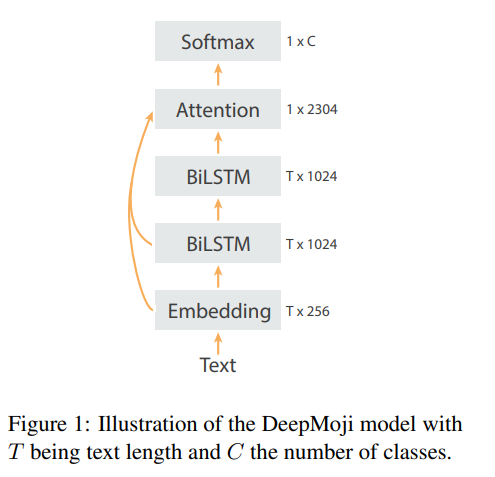


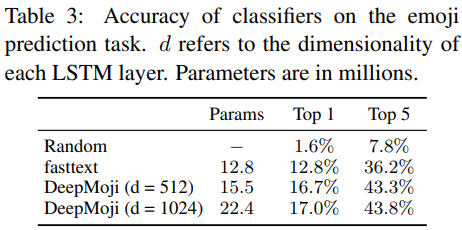

We see that by going with modifying the fastText architecture, in table 3 which is taken from the original Felbo et al. paper, that DeepMoji has a lot more parameters with the addition of the LSTM and attention layer and that the new model has greater Top-1 and Top-5 accuracy (i.e., when multi-classifying, when returning a list of probabilities of each class, Top-1 would be the top prediction corresponding with the ground truth label, while Top-5 would be that the top 5 predictions contain the ground truth label). This means that greater contextual information can be derived by adding such layers. [4]

Using the above model architecture, training was done with a L2 regularization of 1E-6 on the embedding weights. These weights were then transferred (i.e., transfer learning) and used in other domains and spaces. [4]

Going off on a slight tangent, having explained DeepMoji's architecture and training methodology, some context needs to be given towards BERT, as we compare DeepMoji's performance on several benchmark datasets with the newer state-of-the-art model BERT.

BERT stands for Bidirectional Encoder Representations from Transformers. First introduced by Google in 2017, it is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of NLP tasks. [5][6]


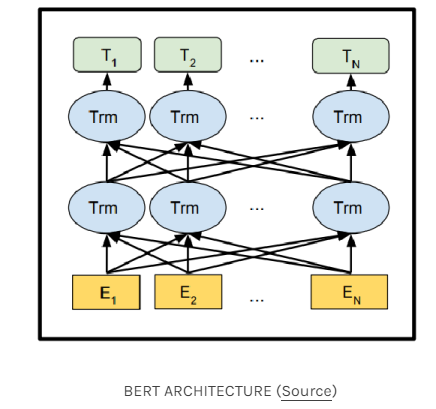
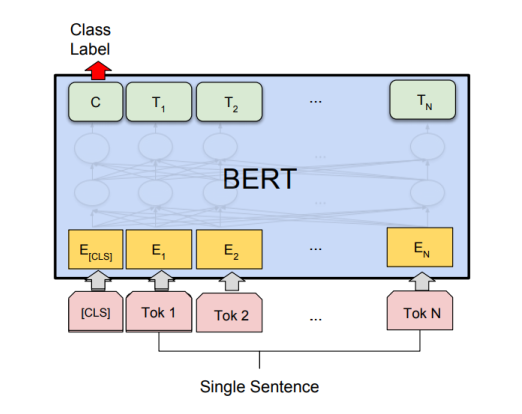

In the first image a word starts with its embedding representation from the embedding layer. Every layer does some multi-headed attention computation on the word representation of the previous layer to create a new intermediate representation. All these intermediate representations are of the same size. In the figure above, E1 is the embedding representation, T1 is the final output and Trm are the intermediate representations of the same token. [5][6]

In the second image the tokenzied sentence has each word passed through to the first encoder with each having their own output. The output can be used to represent the feature for each token in the input.[5][6]

BERT is pre-trained on a large corpus of unlabelled text including the entire Wikipedia (that’s 2,500 million words!) and Book Corpus (800 million words). This leads us to our model of choice distilbert-base-uncased-finetuned-sst-2-english which is smaller in scale and computionally cheaper. A distilled version of BERT hence the word distilbert in the name. [5][6]


Having given context to both Felbo et al.'s DeepMoji implementation and BERT (and its variant, distilBERT), our project in mind is to use Felbo et al's weights, and evaluate whether a similar level of performance can be achieved in line with the author's performance, as well as evaluate the performance of a BERT variant with the same datasets.

In terms of the datasets used, two datasets are used for DeepMoji's finetuning, namely SS-Youtube and SS-Twitter, which come from previously published Thelwall et al.'s paper and compose of binary classification for sentiment analysis. For distilBERT, no finetuning was done and only the base model was evaluated from Hugging Face via the Pipeline() function. [7]

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

in order to run the colab smoothly you must have downloaded the repo on github as you will be uploading it into this colab.

In [ ]:
# requirements.txt should be in the root dir with the notebook
# The project folder should be in the MyDrive directory
from google.colab import drive
drive.mount('/content/drive')
!pip install -q -r /content/drive/MyDrive/deepmoji-BERT-main/requirements.txt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -q https://www.dropbox.com/s/xqarafsl6a8f9ny/deepmoji_weights.hdf5 # this gets the saved weights from the paper from dropbox

In [ ]:
# This sets the dictionary working path and lets us use the files in the deepmoji folder
import sys
sys.path.insert(0,'/content/drive/MyDrive/deepmoji-BERT-main/src')
sys.path.insert(0,'/content/drive/MyDrive/deepmoji-BERT-main/src/deepmoji')

In [ ]:
# Importing all requried functions from other files
from __future__ import print_function
import deepmoji.example_helper
import json
from model_def import deepmoji_transfer
from global_variables import PRETRAINED_PATH, VOCAB_PATH, ROOT_PATH
from finetuning import (
    load_benchmark,
    finetune)
from colab_utilities import read_youtube, read_twitter, encode_output, print_metrics # this is a file we created for the purpose of using BERT's pre-trained model

# DeepMoji Model

# SS-Youtube

In [ ]:
with open('/content/drive/MyDrive/deepmoji-BERT-main/vocabulary.json', 'r') as f:
    vocab = json.load(f)

data = load_benchmark('/content/drive/MyDrive/deepmoji-BERT-main/data/SS-Youtube/raw.pickle', vocab)

model = deepmoji_transfer(2, data['maxlen'], PRETRAINED_PATH) #number of classes = 2
model.summary()

Loading weights for embedding
Loading weights for bi_lstm_0
Loading weights for bi_lstm_1
Loading weights for attlayer
Ignoring weights for softmax
Model: "DeepMoji"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 256)      12800000    ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 30, 256)      0           ['embedding[0][0]']              
                                                                                                  
 embed_drop (SpatialDropout1D)  (None, 30,

In [ ]:
model, acc, weight_f1 = finetune(model, data['texts'], data['labels'], 2,
                      data['batch_size'], method='last')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/content/drive/MyDrive/bert_deepmoji/src/deepmoji/finetuning.py:436: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  callbacks=callbacks, verbose=(verbose >= 2))


Method:  last
Metric:  acc
Classes: 2
Trainable weights: [<tf.Variable 'softmax/kernel:0' shape=(2304, 1) dtype=float32, numpy=
array([[ 0.00248576],
       [-0.00203507],
       [ 0.02133039],
       ...,
       [ 0.03886317],
       [-0.03701356],
       [ 0.00652288]], dtype=float32)>, <tf.Variable 'softmax/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
Training..


In [ ]:
print(f"Accuracy of DeepMoji model on Youtube sentiment dataset: {acc}")
print(f"Weighted F1-score of DeepMoji Model on Youtube sentiment dataset: {weight_f1}")

Accuracy of DeepMoji model on Youtube sentiment dataset: 0.9251207709312439
Weighted F1-score of DeepMoji Model on Youtube sentiment dataset: 0.9105117399822058


## SS-Twitter

In [ ]:
data = load_benchmark('/content/drive/MyDrive/deepmoji-BERT-main/data/SS-Twitter/raw.pickle', vocab)

model = deepmoji_transfer(2, data['maxlen'], PRETRAINED_PATH) #number of classes = 2
model.summary()

Loading weights for embedding
Loading weights for bi_lstm_0
Loading weights for bi_lstm_1
Loading weights for attlayer
Ignoring weights for softmax
Model: "DeepMoji"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 256)      12800000    ['input_2[0][0]']                
                                                                                                  
 activation_1 (Activation)      (None, 30, 256)      0           ['embedding[0][0]']              
                                                                                                  
 embed_drop (SpatialDropout1D)  (None, 30,

In [ ]:
model, acc, weight_f1 = finetune(model, data['texts'], data['labels'], 2,
                      data['batch_size'], method='last')

Method:  last
Metric:  acc
Classes: 2
Trainable weights: [<tf.Variable 'softmax/kernel:0' shape=(2304, 1) dtype=float32, numpy=
array([[-0.01837294],
       [ 0.04951162],
       [ 0.04898866],
       ...,
       [ 0.04510672],
       [ 0.0110506 ],
       [ 0.03915862]], dtype=float32)>, <tf.Variable 'softmax/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]
Training..


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/content/drive/MyDrive/bert_deepmoji/src/deepmoji/finetuning.py:436: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  callbacks=callbacks, verbose=(verbose >= 2))


In [ ]:
print(f"Accuracy of DeepMoji model on Twitter sentiment dataset: {acc}")
print(f"Weighted F1-score of DeepMoji Model on Twitter sentiment dataset: {weight_f1}")

Accuracy of DeepMoji model on Twitter sentiment dataset: 0.8755152225494385
Weighted F1-score of DeepMoji Model on Twitter sentiment dataset: 0.877015034015523


# BERT Model

Pre-trained model taken from here: https://huggingface.co/docs/transformers/main_classes/pipelines

In [ ]:
from transformers import pipeline # lets us use pretrained models by passing in the task
from sklearn.metrics import classification_report

Using Twitter data

In [ ]:
texts, labels = read_twitter() # this reads in a parses twitter data
model = pipeline("text-classification") # call our pretrained model for the task of text-classifcation
results = model(texts) # runs the model on the twitter data 
results = encode_output(results) # converts output to match labels
y_pred = []
for result in results:
  y_pred.append(result['label'])
print(classification_report(labels,y_pred))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


              precision    recall  f1-score   support

           0       0.64      0.89      0.74       861
           1       0.89      0.65      0.75      1252

    accuracy                           0.75      2113
   macro avg       0.76      0.77      0.75      2113
weighted avg       0.79      0.75      0.75      2113



Repeating the above code but now using Youtube data

In [ ]:
texts, labels = read_youtube()
model = pipeline("text-classification")
results = model(texts)
results = encode_output(results)
y_pred = []
for result in results:
  y_pred.append(result['label'])
print(classification_report(labels,y_pred))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


              precision    recall  f1-score   support

           0       0.68      0.88      0.77       673
           1       0.94      0.81      0.87      1469

    accuracy                           0.83      2142
   macro avg       0.81      0.85      0.82      2142
weighted avg       0.86      0.83      0.84      2142



# Conclusion and Future Direction
The Deepmoji model performs better than the pre-trained BERT model. When looking at the sole accuracy, the DeepMoji models have an average accuracy of 90% on both the datasets, while looking at the BERT model we have, it only obtains an average of ~80%. This is probably due to the lack of finetuning.  Since BERT is trained on a massive dataset, it takes ages for BERT models to be trained. On the otherhand, since DeepMoji has most of the weights transferred from its pre-training, the training time is much shorter. 

There are a lot more BERT variants. Each has specific tuning and modifications. Using the correct one would result in higher accuracy as BERT has been tested in many use cases with superior accuracy.

While DeepMoji has superior accuracy and f1 score in the datasets we used, the problem is that over time, NLP datasets become less relevant due to changes in language. This problem is exacerbated when an additional variable - emojis, are introduced. These emoji meanings change over time, i.e., where at one time the smiling emoji meant being happy, while nowadays using the smiling emoji could indicate a passive-aggressive tone.

There is also the question of reproducibility with the author results or rather the lack of. The reason being is that the Twitter dataset used to pre-train is unavailable due to "licensing agreements" which means no improvements can be made to the original data filtering.

Furthermore, no measures of time were also given towards training of the initial pre-training model either. If it takes a very long time to train DeepMoji, then for future works, there's no incentive to train DeepMoji again, as BERT has been established as THE state of the art model

For future work, a more recent dataset needs to be generated for DeepMoji as well as expanding on its limited 64-set of emojis. 

In conclusion, while currently it seems DeepMoji performs better than the base unrefined BERT model, it leaves much to be desired. It's almost certain that given finetuning, the BERT model has much greater potential to outperform the DeepMoji as there's many more avenues of finetuning, as well as allows for much greater and simpler configurations as the source code of DeepMoji is considerably harder to navigate through. 

# References:

[1]:  Shah, A., &amp; Maurya, C. K. (2022, February 6). How effective is incongruity? implications for code-MIX SARCASM detection. arXiv.org. Retrieved April 19, 2022, from https://arxiv.org/abs/2202.02702 

[2]:  Grosz, D., &amp; Conde-Cespedes, P. (2020, July 8). Automatic detection of sexist statements commonly used at the workplace. arXiv.org. Retrieved April 19, 2022, from https://arxiv.org/abs/2007.04181 

[3]: Kotelnikova, A., Paschenko, D., Bochenina, K., &amp; Kotelnikov, E. (2021, November 19). Lexicon-based methods vs. Bert for text sentiment analysis. arXiv.org. Retrieved April 19, 2022, from https://arxiv.org/abs/2111.10097

[4] Felbo, B., Mislove, A., Søgaard, A., Rahwan, I., &amp; Lehmann, S. (2017, October 7). Using millions of emoji occurrences to learn any-domain representations for detecting sentiment, emotion and sarcasm. arXiv.org. Retrieved April 19, 2022, from https://arxiv.org/abs/1708.00524 

[5]: What is Bert: Bert for text classification. Analytics Vidhya. (2020, June 14). Retrieved April 19, 2022, from https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/#:~:text=It%20is%20designed%20to%20pre,wide%20range%20of%20NLP%20tasks.%E2%80%9D 

[6]: Seth, Y. (2021, March 28). Bert explained – a list of frequently asked questions. Let the Machines Learn. Retrieved April 19, 2022, from https://yashuseth.wordpress.com/2019/06/12/bert-explained-faqs-understand-bert-working/ 

[7]: Thelwall, M., Buckley, K., &amp; Paltoglou, G. (2011). Sentiment strength detection for the social web. Journal of the American Society for Information Science and Technology, 63(1), 163–173. https://doi.org/10.1002/asi.21662 